In [1]:
import spikeinterface.full as si
from pathlib import Path
import matplotlib.pyplot as plt
import os

In [ ]:
job_kwargs = dict(n_jobs=-1, chunk_duration='1s', progress_bar=True)

In [10]:
base_folder = Path('/home/altiki/Documents/LBB/school_spike_sorting_Aussois_2024-main/')

In [4]:
#ase_folder = '/home/altiki/Documents/LBB/school_spike_sorting_Aussois_2024-main/'
electrode_selection_path = '/home/altiki/Documents/LBB/school_spike_sorting_Aussois_2024-main/data/'
electrode_selection = 'electrodes_1823_active_selection_N1.npy'
single_channel_selection_path = '/home/altiki/Documents/LBB/school_spike_sorting_Aussois_2024-main/data/'
single_channel_selection = 'Channel_Subselections_electrodes_1846_active_selection_2_N1.pkl'
filename = 'ID1846_N1_DIV0_DATE20240402_spontaneous.raw.h5'
filename_path = '/home/altiki/Documents/LBB/school_spike_sorting_Aussois_2024-main/data/'
input_path = os.path.join(filename_path,filename)
single_channel_selection_joined = os.path.join(single_channel_selection_path,single_channel_selection)
recording = si.read_maxwell(input_path)


In [9]:

recording_f = si.highpass_filter(recording, freq_min=200, dtype='float32')
bad_channel_ids, channel_labels = si.detect_bad_channels(recording_f)
print("Some bad channels are detected", bad_channel_ids)
recording_f = recording_f.remove_channels(bad_channel_ids)
recording_f = si.common_reference(recording_f)
print(recording_f)

Some bad channels are detected ['136' '152' '184' '216' '244' '248' '282' '692' '861' '935' '968' '983']
CommonReferenceRecording: 634 channels - 20.0kHz - 1 segments - 2,401,800 samples 
                          120.09s (2.00 minutes) - float32 dtype - 5.67 GiB


In [5]:
recording_f = si.highpass_filter(recording, freq_min=200, dtype='float32')

In [6]:
si.get_default_sorter_params('spykingcircus2')

{'general': {'ms_before': 2, 'ms_after': 2, 'radius_um': 2000},
 'sparsity': {'method': 'ptp', 'threshold': 0.25},
 'filtering': {'freq_min': 150},
 'detection': {'peak_sign': 'neg', 'detect_threshold': 4},
 'selection': {'method': 'smart_sampling_amplitudes',
  'n_peaks_per_channel': 5000,
  'min_n_peaks': 100000,
  'select_per_channel': False,
  'seed': 42},
 'clustering': {'legacy': False},
 'matching': {'method': 'wave_clus'},
 'apply_preprocessing': True,
 'cache_preprocessing': {'mode': 'memory',
  'memory_limit': 0.5,
  'delete_cache': True},
 'multi_units_only': False,
 'job_kwargs': {'n_jobs': 0.8},
 'debug': False}

In [12]:
sorting = si.run_sorter('spykingcircus2', recording_f,
                        output_folder=base_folder / 'sorter_SC2',
                        verbose=True, apply_preprocessing=False)

write_memory_recording with n_jobs = 6 and chunk_size = 20000


write_memory_recording:   0%|          | 0/121 [00:00<?, ?it/s]

detect peaks using locally_exclusive with n_jobs = 6 and chunk_size = 20000


detect peaks using locally_exclusive:   0%|          | 0/121 [00:00<?, ?it/s]

We found 25206 peaks in total
We kept 25206 peaks for clustering
extracting features with n_jobs = 6 and chunk_size = 20000


extracting features:   0%|          | 0/121 [00:00<?, ?it/s]

estimate_templates with n_jobs = 6 and chunk_size = 20000


estimate_templates:   0%|          | 0/121 [00:00<?, ?it/s]

We found 49 raw clusters, starting to clean with matching...


write_memory_recording:   0%|          | 0/1 [00:00<?, ?it/s]

We kept 39 non-duplicated clusters...
estimate_templates with n_jobs = 6 and chunk_size = 20000


estimate_templates:   0%|          | 0/121 [00:00<?, ?it/s]

Error running spykingcircus2


SpikeSortingError: Spike sorting error trace:
Traceback (most recent call last):
  File "/home/altiki/Documents/LBB/school_spike_sorting_Aussois_2024-main/.venv/lib/python3.8/site-packages/spikeinterface/sorters/basesorter.py", line 258, in run_from_folder
    SorterClass._run_from_folder(sorter_output_folder, sorter_params, verbose)
  File "/home/altiki/Documents/LBB/school_spike_sorting_Aussois_2024-main/.venv/lib/python3.8/site-packages/spikeinterface/sorters/internal/spyking_circus2.py", line 240, in _run_from_folder
    spikes = find_spikes_from_templates(
  File "/home/altiki/Documents/LBB/school_spike_sorting_Aussois_2024-main/.venv/lib/python3.8/site-packages/spikeinterface/sortingcomponents/matching/main.py", line 36, in find_spikes_from_templates
    assert method in matching_methods, f"The 'method' {method} is not valid. Use a method from {matching_methods}"
AssertionError: The 'method' wave_clus is not valid. Use a method from {'naive': <class 'spikeinterface.sortingcomponents.matching.naive.NaiveMatching'>, 'tdc-peeler': <class 'spikeinterface.sortingcomponents.matching.tdc.TridesclousPeeler'>, 'circus': <class 'spikeinterface.sortingcomponents.matching.circus.CircusPeeler'>, 'circus-omp-svd': <class 'spikeinterface.sortingcomponents.matching.circus.CircusOMPSVDPeeler'>, 'wobble': <class 'spikeinterface.sortingcomponents.matching.wobble.WobbleMatch'>}

Spike sorting failed. You can inspect the runtime trace in /home/altiki/Documents/LBB/school_spike_sorting_Aussois_2024-main/sorter_SC2/spikeinterface_log.json.

In [11]:
sorting = si.read_sorter_folder(base_folder / 'sorter_SC2')
sorting

NumpyFolderSorting: 457 units - 1 segments - 20.0kHz

In [12]:
analyzer = si.create_sorting_analyzer(sorting, recording_f, format='memory', sparse=True, **job_kwargs)
analyzer

estimate_sparsity:   0%|          | 0/121 [00:00<?, ?it/s]

SortingAnalyzer: 634 channels - 457 units - 1 segments - memory - sparse - has recording
Loaded 0 extensions: 

In [13]:
analyzer.compute("random_spikes", method="uniform", max_spikes_per_unit=500)
analyzer.compute("waveforms", ms_before=1.2, ms_after=2.5)
analyzer.compute("templates", operators=["average", "std"])
analyzer.compute("noise_levels")

analyzer

compute_waveforms:   0%|          | 0/121 [00:00<?, ?it/s]

SortingAnalyzer: 634 channels - 457 units - 1 segments - memory - sparse - has recording
Loaded 4 extensions: random_spikes, waveforms, templates, noise_levels

In [14]:
analyzer.compute({
    "random_spikes" : dict(method="uniform", max_spikes_per_unit=500),
    "waveforms" :  dict(ms_before=1.2, ms_after=2.5),
    "templates" : dict(operators=["average", "std"]),
    "noise_levels": dict(),
}, **job_kwargs)
analyzer

compute_waveforms:   0%|          | 0/121 [00:00<?, ?it/s]

SortingAnalyzer: 634 channels - 457 units - 1 segments - memory - sparse - has recording
Loaded 4 extensions: random_spikes, noise_levels, waveforms, templates

In [16]:
analyzer.compute({
    "principal_components": dict(n_components=3, mode="by_channel_global"),
    "spike_amplitudes": dict(),
    "unit_locations": dict(method="monopolar_triangulation"),
    "spike_locations": dict(method="center_of_mass"),
    "template_similarity": dict(),
    "correlograms": dict(),
}, **job_kwargs)
analyzer

Fitting PCA:   0%|          | 0/457 [00:00<?, ?it/s]

Projecting waveforms:   0%|          | 0/457 [00:00<?, ?it/s]

spike_amplitudes:   0%|          | 0/121 [00:00<?, ?it/s]

/home/altiki/Documents/LBB/school_spike_sorting_Aussois_2024-main/.venv/lib/python3.8/site-packages/spikeinterface/postprocessing/unit_localization.py:104: RuntimeWarning: invalid value encountered in divide
  com = np.sum(wf_data[:, np.newaxis] * local_contact_locations, axis=0) / np.sum(wf_data)
/home/altiki/Documents/LBB/school_spike_sorting_Aussois_2024-main/.venv/lib/python3.8/site-packages/spikeinterface/postprocessing/unit_localization.py:178: RuntimeWarning: invalid value encountered in divide
  np.square(wf_data / max_data - data_at(x, y, z, alpha, local_contact_locations)).mean()


spike_locations:   0%|          | 0/121 [00:00<?, ?it/s]

SortingAnalyzer: 634 channels - 457 units - 1 segments - memory - sparse - has recording
Loaded 10 extensions: random_spikes, noise_levels, waveforms, templates, principal_components, spike_amplitudes, unit_locations, spike_locations, template_similarity, correlograms

In [17]:
print(si.get_quality_metric_list())
print(si.get_quality_pca_metric_list())

['num_spikes', 'firing_rate', 'presence_ratio', 'snr', 'isi_violation', 'rp_violation', 'sliding_rp_violation', 'amplitude_cutoff', 'amplitude_median', 'amplitude_cv', 'synchrony', 'firing_range', 'drift', 'sd_ratio']
['isolation_distance', 'l_ratio', 'd_prime', 'nearest_neighbor', 'nn_isolation', 'nn_noise_overlap', 'silhouette']


In [18]:
metric_names = si.get_quality_metric_list()
metrics = si.compute_quality_metrics(analyzer, metric_names=metric_names, **job_kwargs)
metrics

/home/altiki/Documents/LBB/school_spike_sorting_Aussois_2024-main/.venv/lib/python3.8/site-packages/spikeinterface/qualitymetrics/quality_metric_calculator.py:108: UserWarning: Units [  6  34  35  39  43  46  47  51  65  66  74  82  86  91  97  98  99 105
 125 164 167 216 218 247 275 297 307 380 400 447] are empty. Quality metrcs will be set to NaN for these units.
 To remove empty units, use `sorting.remove_empty_units()`.
  warnings.warn(
/home/altiki/Documents/LBB/school_spike_sorting_Aussois_2024-main/.venv/lib/python3.8/site-packages/spikeinterface/qualitymetrics/misc_metrics.py:846: UserWarning: Some units have too few spikes : amplitude_cutoff is set to NaN
  warnings.warn(f"Some units have too few spikes : amplitude_cutoff is set to NaN")


,amplitude_cutoff,amplitude_cv_median,amplitude_cv_range,amplitude_median,drift_ptp,drift_std,drift_mad,firing_range,firing_rate,isi_violations_ratio,...,num_spikes,presence_ratio,rp_contamination,rp_violations,sd_ratio,sliding_rp_violation,snr,sync_spike_2,sync_spike_4,sync_spike_8
0,NaN,NaN,NaN,-289.475250,NaN,NaN,NaN,0.00,0.008327,0.000000,...,1.0,0.5,0.0,0.0,0.000000,NaN,25.480730,0.000000,0.0,0.0
1,NaN,NaN,NaN,-278.204041,NaN,NaN,NaN,1.20,0.957615,0.000000,...,115.0,1.0,0.0,0.0,0.722292,NaN,24.485115,0.034783,0.0,0.0
2,NaN,NaN,NaN,-310.165466,NaN,NaN,NaN,0.20,0.108252,0.000000,...,13.0,1.0,0.0,0.0,0.317614,NaN,27.452010,0.000000,0.0,0.0
3,NaN,NaN,NaN,-316.955994,NaN,NaN,NaN,0.00,0.008327,0.000000,...,1.0,0.5,0.0,0.0,0.000000,NaN,27.848374,1.000000,0.0,0.0
4,NaN,NaN,NaN,-305.224182,NaN,NaN,NaN,0.60,0.274794,0.000000,...,33.0,1.0,0.0,0.0,0.706913,NaN,26.958568,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,NaN,NaN,NaN,-9.907469,NaN,NaN,NaN,1.34,0.449663,0.000000,...,54.0,1.0,0.0,0.0,0.988833,NaN,1.034718,0.018519,0.0,0.0
453,NaN,NaN,NaN,-199.608109,NaN,NaN,NaN,0.00,0.008327,0.000000,...,1.0,0.5,0.0,0.0,0.000000,NaN,16.422873,0.000000,0.0,0.0
454,NaN,NaN,NaN,-15.899485,NaN,NaN,NaN,0.80,0.358065,21.649540,...,43.0,1.0,1.0,1.0,0.637557,NaN,1.306720,0.000000,0.0,0.0
455,NaN,NaN,NaN,-15.374926,NaN,NaN,NaN,1.51,1.090849,4.665229,...,131.0,1.0,1.0,1.0,0.695801,NaN,1.257945,0.015267,0.0,0.0


In [19]:
analyzer

SortingAnalyzer: 634 channels - 457 units - 1 segments - memory - sparse - has recording
Loaded 11 extensions: random_spikes, noise_levels, waveforms, templates, principal_components, spike_amplitudes, unit_locations, spike_locations, template_similarity, correlograms, quality_metrics

In [20]:
si.export_to_phy(analyzer,
    output_folder=base_folder / 'phy_SC2',
    compute_pc_features=False,
    compute_amplitudes=True,
    copy_binary=False,
    **job_kwargs)
import os

/home/altiki/Documents/LBB/school_spike_sorting_Aussois_2024-main/.venv/lib/python3.8/site-packages/spikeinterface/exporters/to_phy.py:117: UserWarning: Empty units have been removed while exporting to Phy
  warnings.warn("Empty units have been removed while exporting to Phy")


ValueError: All arrays must be of the same length

In [22]:
## Get unit_ids
good_units_ids = metrics.query('snr > 5 & rp_contamination < 0.5').index.tolist()
print(len(good_units_ids))

196


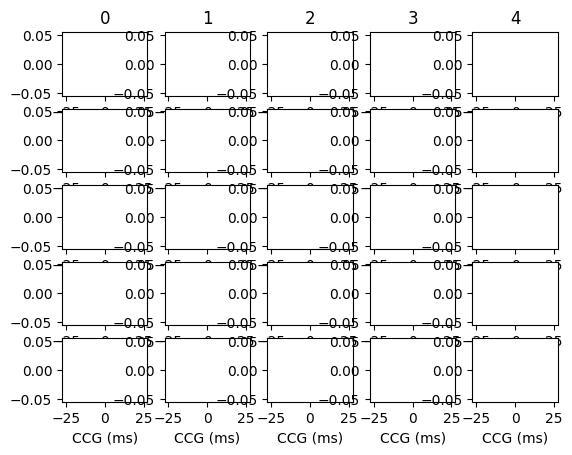

In [24]:
si.plot_crosscorrelograms(analyzer, unit_ids=good_units_ids[:5])

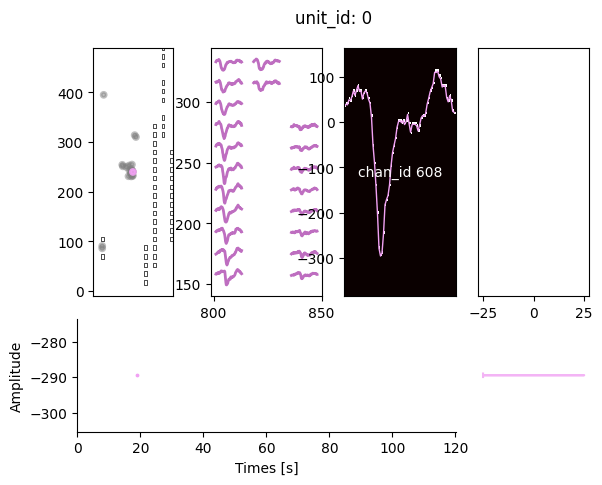

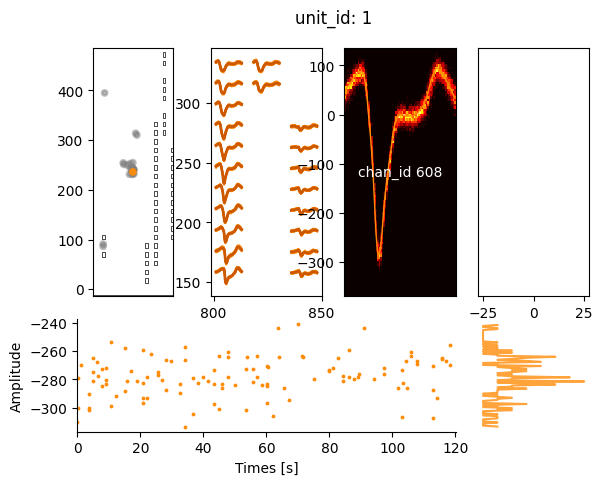

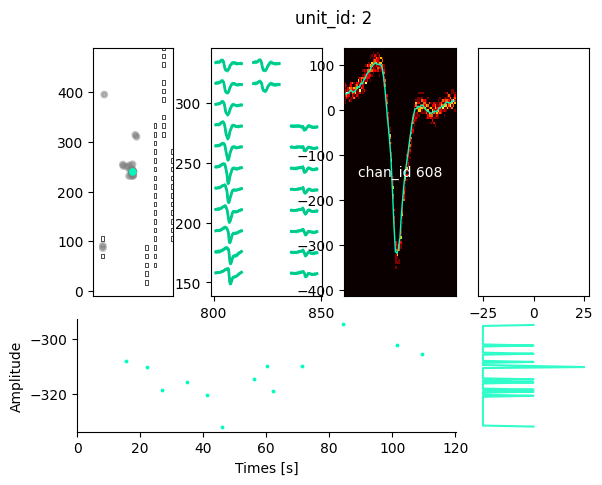

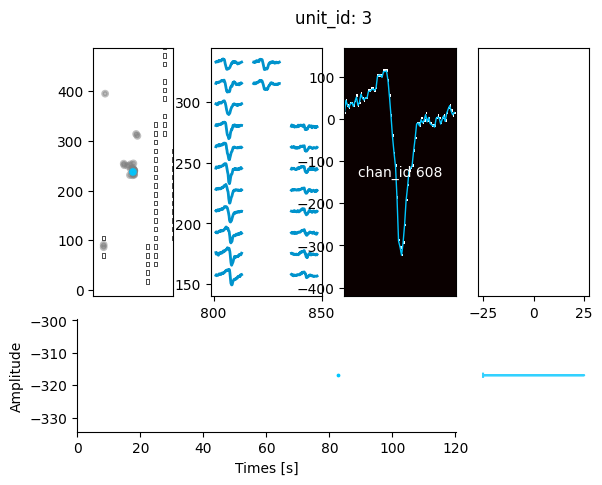

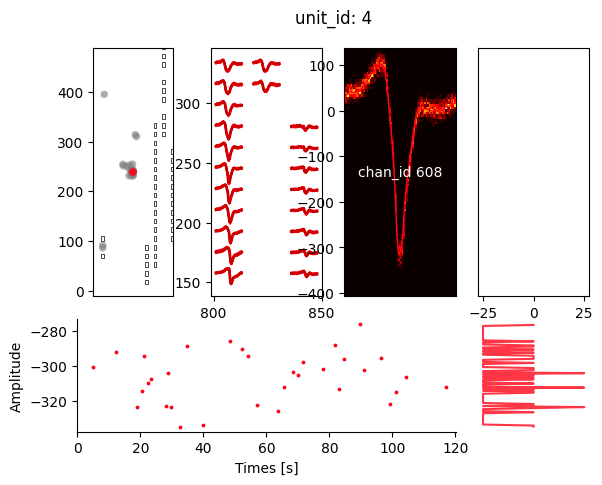

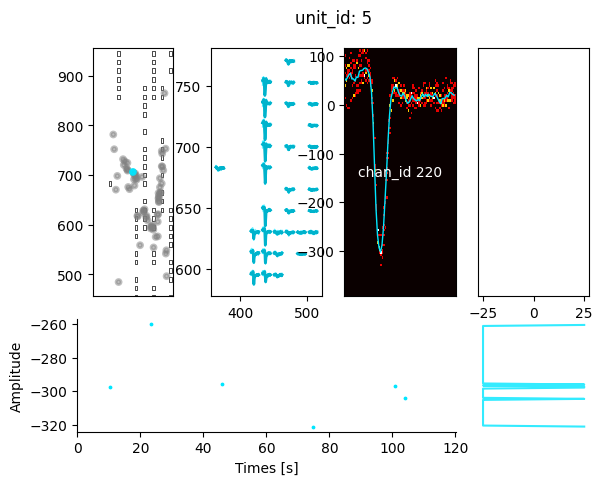

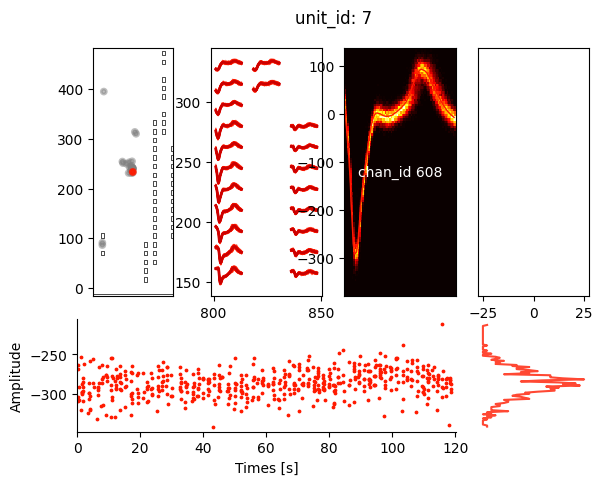

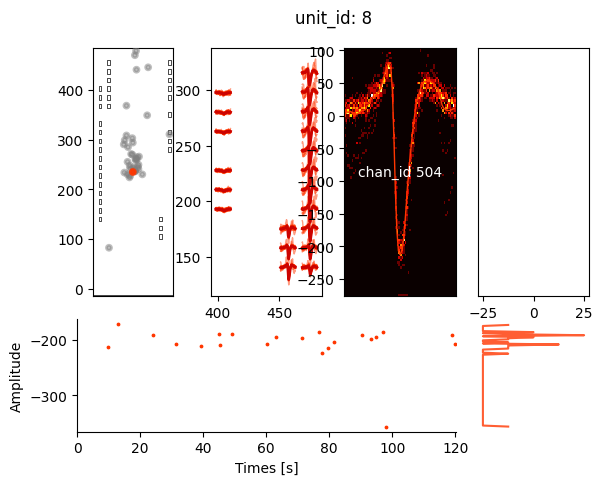

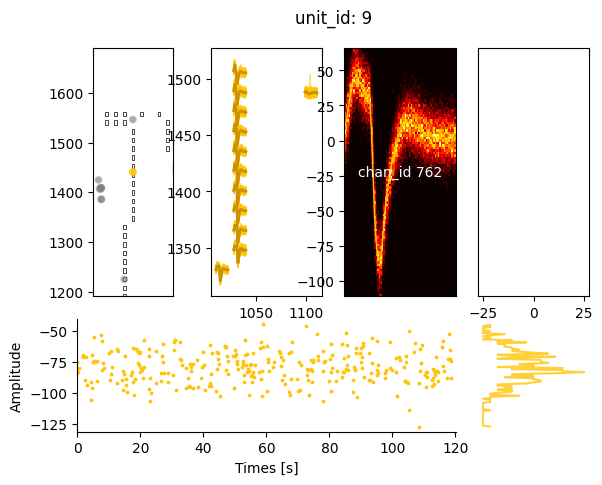

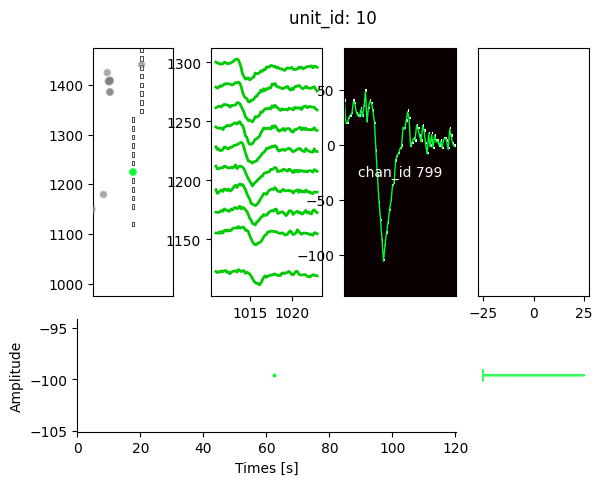

In [26]:
for i in range(10):
    si.plot_unit_summary(analyzer, unit_id=good_units_ids[10+i])

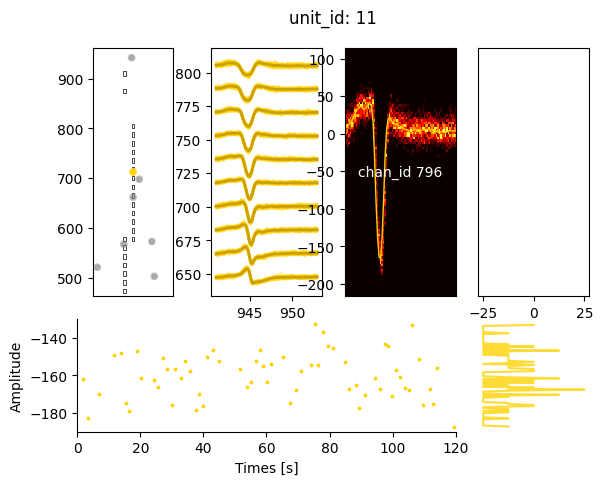

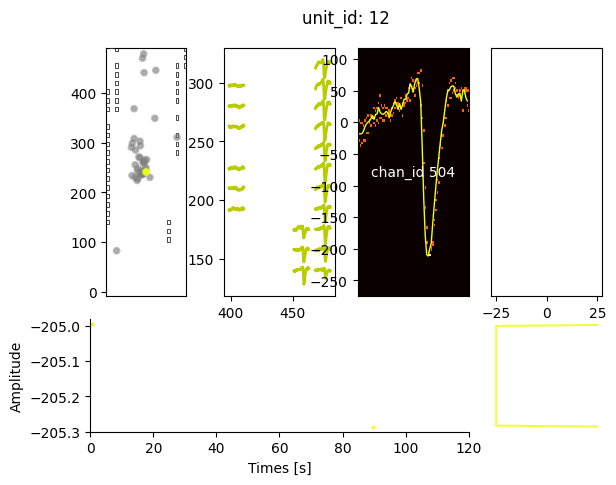

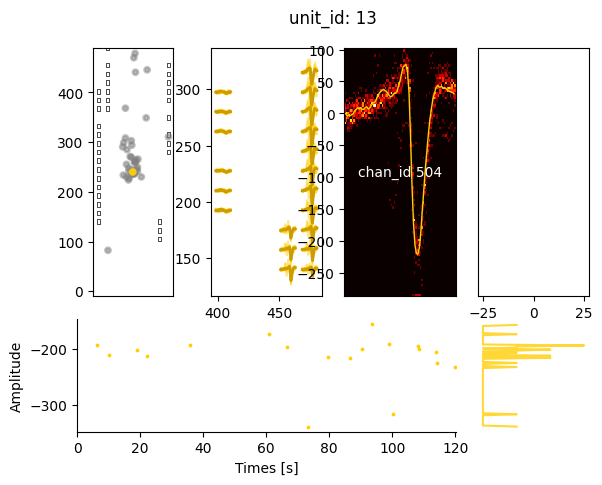

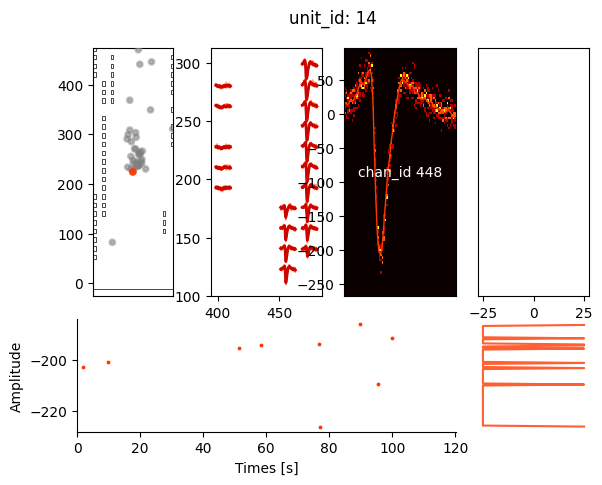

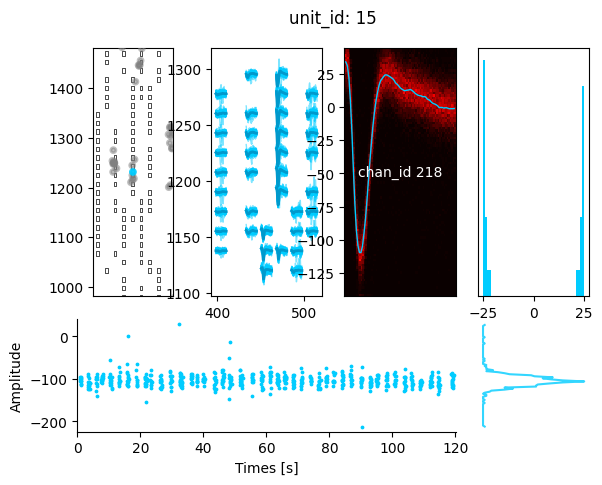

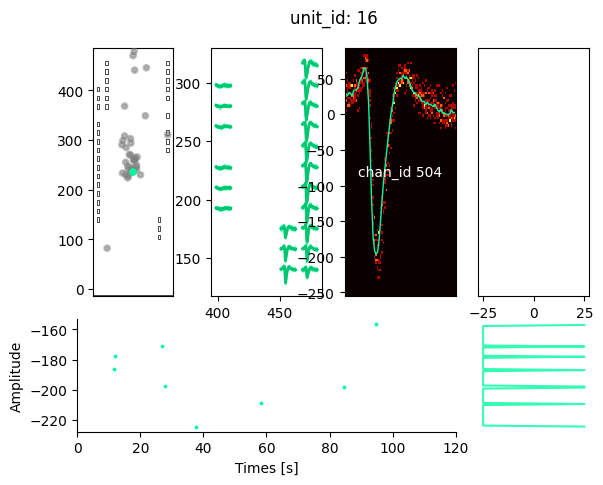

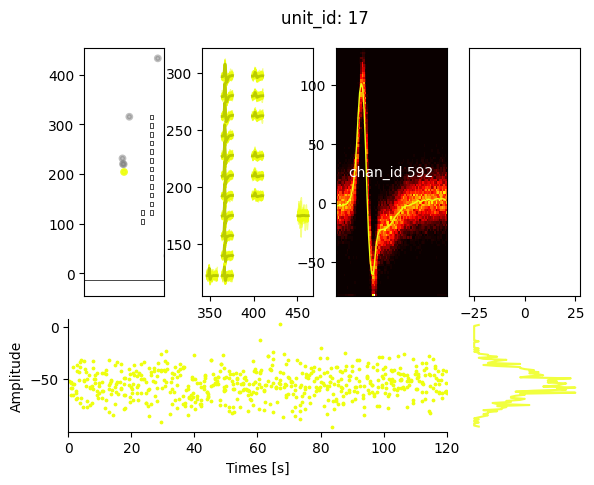

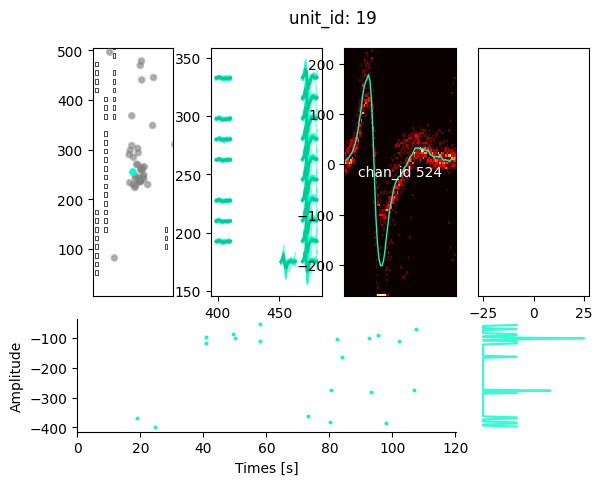

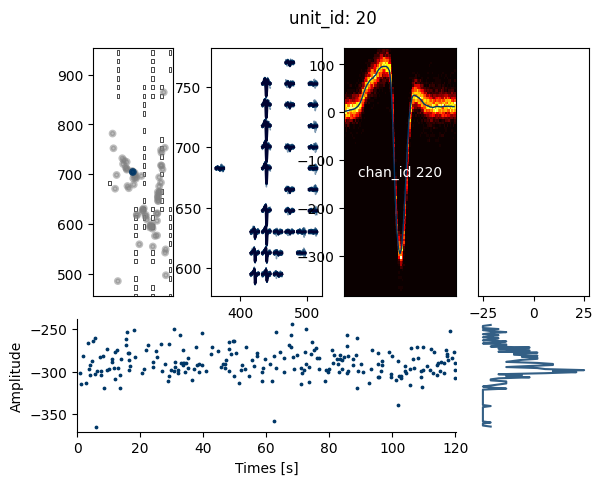

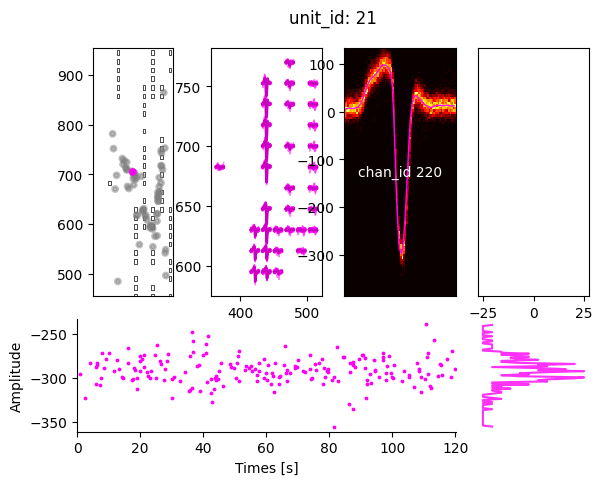

In [28]:
for i in range(10):
    si.plot_unit_summary(analyzer, unit_id=good_units_ids[10+i])

ValueError: zero-size array to reduction operation minimum which has no identity

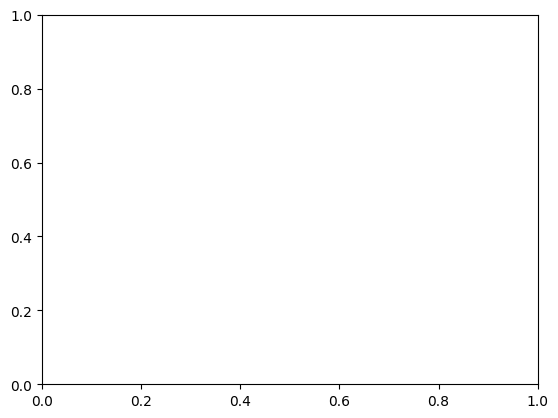

In [32]:
si.plot_all_amplitudes_distributions(analyzer)

In [31]:
print(analyzer)

SortingAnalyzer: 634 channels - 457 units - 1 segments - memory - sparse - has recording
Loaded 11 extensions: random_spikes, noise_levels, waveforms, templates, principal_components, spike_amplitudes, unit_locations, spike_locations, template_similarity, correlograms, quality_metrics


In [33]:
%matplotlib widget
si.plot_unit_templates(analyzer, backend='ipywidgets')

AppLayout(children=(HBox(children=(Checkbox(value=False, description='same axis'), Checkbox(value=True, descri…

In [34]:
analyzer_clean = analyzer.select_units(good_units_ids)
analyzer_clean

SortingAnalyzer: 634 channels - 196 units - 1 segments - memory - sparse - has recording
Loaded 11 extensions: random_spikes, noise_levels, waveforms, templates, principal_components, spike_amplitudes, unit_locations, spike_locations, template_similarity, correlograms, quality_metrics

In [1]:
%gui qt
si.plot_sorting_summary(analyzer_clean, backend="spikeinterface_gui")

: 

In [ ]:
si.plot_sorting_summary(analyzer_clean, backend="sortingview")